In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

from data import Dataloader
from models import HeuristicModelUTA

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()
Z = data_loader.get_ground_truth_labels()

parameters = {"n_pieces": 5, "n_clusters": 3}
model = HeuristicModelUTA(**parameters)
model.fit(X, Y)


Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11


c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\romai\Documents\Centrale\Système de décision\Projet\cs-sdp-2023-24\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Number of features provided: 10
Number of criterions expected: 10
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13620H, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 40152 rows, 120186 columns and 1353239 nonzeros
Model fingerprint: 0x737961a0
Coefficient statistics:
  Matrix range     [5e-06, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e-03]
Presolve removed 0 rows and 80004 columns
Presolve time: 0.85s
Presolved: 180 rows, 40152 columns, 1313237 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 5.310e+03
 Factor NZ  : 5.490e+03 (roughly 16 MB of memory)
 Factor Ops : 2.214e+0

In [2]:
from metrics import PairsExplained, ClusterIntersection

pairs_explained_metric = PairsExplained()
print("Percentage of explained preferences on train data:", pairs_explained_metric.from_model(model, X, Y))

cluster_intersection_metric = ClusterIntersection()
print("Percentage of preferences well regrouped into clusters:", cluster_intersection_metric.from_model(model, X, Y,Z))

Percentage of explained preferences on train data: 0.9831758412079395
Percentage of preferences well regrouped into clusters: 0.8297091732748679


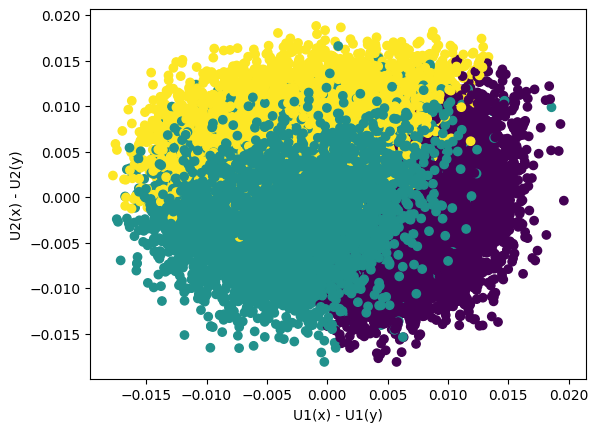

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0],
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1],
            c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()

In [5]:
model.predict_utility(X)[:3, 0]

array([0.01561475, 0.01427678, 0.01721766])

In [6]:
model.predict_utility(X)[:3, 1]

array([0.01098519, 0.0081574 , 0.01832377])

In [7]:
model.predict_utility(X)[:3]

array([[0.01561475, 0.01098519, 0.01024267],
       [0.01427678, 0.0081574 , 0.01244977],
       [0.01721766, 0.01832377, 0.01318293]])

In [13]:
model.predict_preference(X[:3], Y[:3])

array([[0, 0, 1],
       [1, 0, 0],
       [1, 1, 0]])